# The Need for Quantization



### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

Statistical mechanics works extremely well. There are, however, places where its predictions appear to break down. It turns out that it's not statistical mechanics that has a problem, but rather our modeling of the systems using "classical" physics. We can rescue the situation by introducing the idea that the permitted energies for systems are not completely continuous, but instead discrete. Let's look at some situations.

## Heat Capacities

For an ideal gas, the total kinetic energy of the gas is found to be (either from the kinetic theory of gases, or from the Sackur-Tetrode equation):

$$ E = \frac{3}{2}N k_B T $$

which means that the heat capacity at constant volume, i.e. the amount of energy it takes to raise the temperature $T$ by a certain amount, is given by

$$ \begin{align*}
\Delta T &= \Delta E/C_V\\
C_V &= \frac{\Delta E}{\Delta T} = \frac{3}{2}N k_B = \frac{3}{2} n R
\end{align*}
$$

This is quite well respected for the monatomic noble gases (helium, neon, and so on).  But it is generally quite wrong for diatomic gases, like nitrogen or carbon monoxide.  We might think this is OK, since diatomic gases should definitely be able to have rotational kinetic energy also, and we could treat the bond between the two atoms as a simple harmonic oscillator, so the distance between the two atoms could vary too.  So a diatomic gas could be expected to have 7 degrees of freedom which matter:

| Source | d.o.f. |
| ------ | ------ |
| Translational KE | 3 (x, y, z) |
| Rotational KE | 2 (direction of rotation axis) |
| Vibrational KE | 1 (relative velocity of atoms) |
| Vibrational PE | 1 (separation of atoms) |

So we may expect diatomic molecules to have $C_V = \frac{7}{2} n R$. Let's look at the values for real gases at standard conditions.

In [2]:
# Here we will generate plots of the heat capacity of various elements
# data are from NIST, documented on data.gov:
# https://catalog.data.gov/dataset/the-nbs-tables-of-chemical-thermodynamic-properties-selected-values-for-inorganic-and-c1-a
import pandas
df = pandas.read_csv('https://data.nist.gov/od/ds/mds2-2124/NBS_Tables_with_ErratumValues.csv',
                    header=1, index_col='Formula')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60


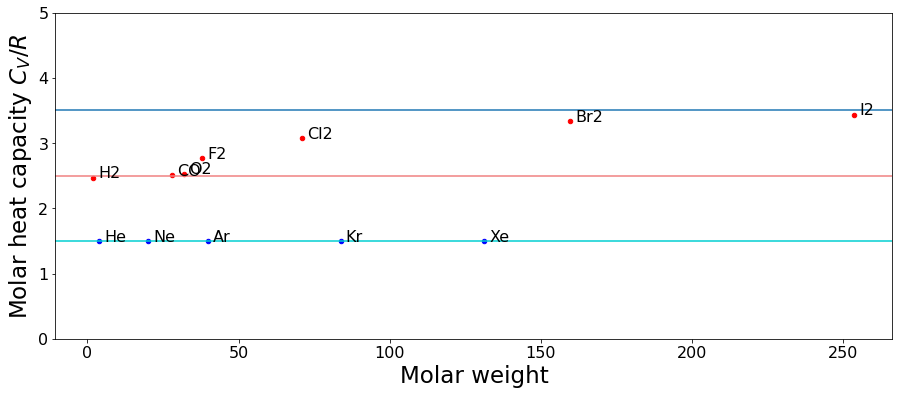

In [15]:
R=8.314 # J/mol K
# Select noble gases in the gaseus state, force the columns we want to be a float
noble_gases = df[df['State']=='g'].loc[['He', 'Ne', 'Ar', 'Kr', 'Xe']].astype({'Cp\nJ mol-1 K-1': 'float', 'Molar Mass\ng mol-1': 'float'})
#print(noble_gases)
# The following is heat capacity at *constant pressure* - which is the *constant volume* heat capacity + one
noble_gases['Cv/R']=noble_gases['Cp\nJ mol-1 K-1']/R-1
# Select some other gases, force the columns we want to be a float
other_gases = df[df['State']=='g'].loc[['H2', 'O2', 'CO', 'Cl2', 'F2', 'Br2', 'I2']].astype({'Cp\nJ mol-1 K-1': 'float', 'Molar Mass\ng mol-1': 'float'})
other_gases['Cv/R']=other_gases['Cp\nJ mol-1 K-1']/R-1
fig, ax = plt.subplots(figsize=(15,6))
other_gases.plot(x='Molar Mass\ng mol-1', y='Cv/R', kind='scatter', color='r', ax=ax)
noble_gases.plot(x='Molar Mass\ng mol-1', y='Cv/R', kind='scatter', color='b', ax=ax)#, figsize=(8,6))
for row in noble_gases.itertuples():
    ax.annotate(row.Index, (row._5, row._13), xytext=(5, 0), textcoords='offset points')
for row in other_gases.itertuples():
    ax.annotate(row.Index, (row._5, row._13), xytext=(5, 0), textcoords='offset points')
plt.ylabel('Molar heat capacity $C_V/R$', fontsize='x-large')
plt.xlabel('Molar weight', fontsize='x-large')
plt.axhline(1.5, color='darkturquoise')
plt.axhline(2.5, color='lightcoral')
plt.axhline(3.5)
ax.set_ylim(0,5)
plt.show()

So this is a bit peculiar. The noble gases do indeed cluster at $3/2$. But the diatomic gases range from $\sim 2.5$ to $\sim 3.5$, where the heavier the gas molecules are, the closer the values get to $3.5$. It's as if certain degrees of freedom are not fully accessible for the lighter molecules.

Looking at the heat capacity as a function of temperature shows us something interesting:

[![Specific heat vs T](images/DiatomicSpecHeat2.png)](https://en.wikipedia.org/wiki/Molar_heat_capacity#/media/File:DiatomicSpecHeat2.png)

The heat capacity increases with $T$ and there seem to be plateaus in various places. Hydrogen in fact dips below $5/2$ at a point. The general observed pattern looks like this:

[![Specific heat vs T](images/DiatomicSpecHeat1.png)](https://en.wikipedia.org/wiki/Molar_heat_capacity#/media/File:DiatomicSpecHeat1.png)

How can we resolve this? The core problem seems to be that certain kinds of motion appear to not be able to take the full $\frac{1}{2} k_B T$ per degree of freedom until the temperature $T$ gets high enough.  In classical mechanics this makes no sense: I can always rotate an object arbitrarily slowly, so that it has $\frac{1}{2} k_B T$ of energy. In the new _quantum_ theory, there is an _energy gap_ between the lowest energy state (no rotation) and the first state with higher energy than that (with non-zero rotation); **it is not possible to rotate arbitrarily slowly**. Similarly there is an energy gap between the lowest vibrational energy state and the first vibrating state; **it is not possible to have a vibration of arbitrarily small magnitude**. Because of this, if $k_B T$ falls below the size of this energy gap, it is very unlikely for the molecule to rotate or vibrate at all, and instead it is locked in the lowest energy state: that degree of freedom is said to be _frozen out_.  Experimentally it is found that the energy gap for rotation is lower than the energy gap for vibration, and that the energy gap gets bigger as the masses get smaller.

A similar kind of effect is seen for solids, which the Dulong-Petit law says should have heat capacity $\sim 3R$. The following plot shows the heat capacity (specific heat) for silver (Dulong-Petit predicts $C \sim 24.9$ J/mol K $\sim 233$ J/kg K):

[![Specific heat of silver](images/silver_specheat.jpg)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4887198)

At room temperature silver's heat capacity is the Dulong-Petit value, but it falls as energy decreases.  Einstein considered this in a model of a solid (the so-called *Einstein solid*) as a set of atoms with (uncorrelated) simple harmonic motion around their equilibrium positions, with the requirement that the energy of each atom above the lowest energy state is a value $Mhf$, where $M$ is an integer, $f$ is the frequency of the oscillator, and $h$ is a constant which we'll get to in a bit.  In this model, since there is a minimum energy above the ground state $hf$, if the total energy of the system is low enough, some atoms will be totally locked out of motion because there won't be enough total energy to give all atoms at least $hf$ energy.  Therefore a similar freezing out effect occurs as for ideal gases.

The common thread in all these cases is the idea that some kinds of motion cannot be infinitesimally small, but in fact show a well-defined gap between the lowest energy state and the next state with higher energy.

### The Ultraviolet Catastrophe

Let's consider a very simple model that shows this problem.  Consider two parallel metal plates at $x=0$ and $x=L$, and allow the space in between to be filled by electromagnetic waves (only in one dimension, for simplicity). The standing waves must satsify

$$ \frac{L}{\lambda} = n\pi $$

where $n$ is some integer and $\lambda$ is the wavelength. Equivalentlly we can write this in terms of the frequency, $f = c/\lambda$:

$$ f = \frac{n\pi}{L} $$

Each of the $n$ corresponds to an independent electromagnetic wave, and it turns out that we should assign $2 \times \frac{1}{2} k_B T$ of energy via the equipartition principle to each one.  But there are infinitely many $n$! If all modes satisfy the equipartition principle we should have an infinite amount of electromagnetic energy between the plates!

The result for 3D has the same problem, only worse.  

https://en.wikipedia.org/wiki/Planck%27s_law#/media/File:Black_body.svg

Planck managed to reconcile with the actual observed distribution by assuming that the energy in each mode had to be $Nhf$, with $N$ an integer, $f$ the frequency, and $h$ a constant, which turns out to be the same as what Einstein needed to use in his model.